In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
sns.set(style='white', font_scale=1.2)
import scipy.stats

In [3]:
df = pd.read_csv('bitcoin_train.csv')

In [3]:
df

,Unnamed: 0,address,year,day,length,weight,count,looped,neighbors,income,label
0,0,1BpvJgUs7UprQu9z8fLsP7pFvFcCscHRCV,2011,287,2,0.250000,1,0,2,3.009500e+08,white
1,1,1EnSeTPjMxZm9X9iQDYmMUDoLQQ3ouDN6F,2015,77,0,1.000000,1,0,1,4.820000e+07,white
2,2,1mwkhYHeoqGBkVW84yFpYCSqRDt5TWSBQ,2011,164,52,0.000977,23,0,2,2.349582e+10,white
3,3,19XUCsxgpHZGXKLgVMpdoyZqcFdeM3pGeE,2014,86,144,0.000001,1555,1152,2,9.581274e+07,white
4,4,14Ef6MGSYLEbigo55CpPBGEGSGYwwB7xhY,2015,261,6,0.250000,1,0,2,3.424024e+07,white
...,...,...,...,...,...,...,...,...,...,...,...
2333352,2333352,1G4LMHcXfzzf3B5TrcYJXmSQx8o49Nm2qY,2011,314,10,0.062500,1,0,1,5.140488e+07,white
2333353,2333353,1NTVQDhQEuiu3LKEAat5vCZ5otfwFajd4a,2017,360,144,0.003251,6066,0,2,1.000000e+08,white
2333354,2333354,1AjhfWSg2VCEnRMuzH5ge1FfTamjqBE9hg,2017,160,20,0.002604,2,0,2,3.324864e+09,white
2333355,2333355,1BJd8jqJh9BgNKKFMg7U3NjxoiaHFKcLxe,2012,362,0,1.000000,1,0,2,1.045210e+09,white


In [4]:
# Data Visualization

In [8]:
# FIrst peak
df.head()

,Unnamed: 0,address,year,day,length,weight,count,looped,neighbors,income,label
0,0,1BpvJgUs7UprQu9z8fLsP7pFvFcCscHRCV,2011,287,2,0.250000,1,0,2,3.009500e+08,white
1,1,1EnSeTPjMxZm9X9iQDYmMUDoLQQ3ouDN6F,2015,77,0,1.000000,1,0,1,4.820000e+07,white
2,2,1mwkhYHeoqGBkVW84yFpYCSqRDt5TWSBQ,2011,164,52,0.000977,23,0,2,2.349582e+10,white
3,3,19XUCsxgpHZGXKLgVMpdoyZqcFdeM3pGeE,2014,86,144,0.000001,1555,1152,2,9.581274e+07,white
4,4,14Ef6MGSYLEbigo55CpPBGEGSGYwwB7xhY,2015,261,6,0.250000,1,0,2,3.424024e+07,white


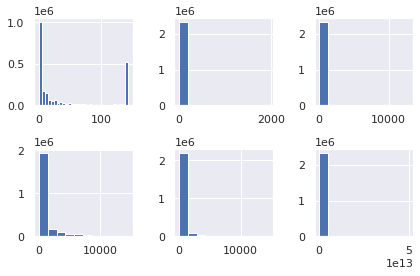

In [9]:
# histogram of key variables
figure, axes = plt.subplots(2, 3)
axes[0, 0].hist(df['length'], bins = 30)
axes[0, 1].hist(df['weight'])
axes[1, 0].hist(df['count'])
axes[1, 1].hist(df['looped'])
axes[0, 2].hist(df['neighbors'])
axes[1, 2].hist(df['income'])
figure.tight_layout()

[Text(0.5, 0, 'length'),
 Text(1.5, 0, 'weight'),
 Text(2.5, 0, 'count'),
 Text(3.5, 0, 'looped'),
 Text(4.5, 0, 'neighbors'),
 Text(5.5, 0, 'income')]

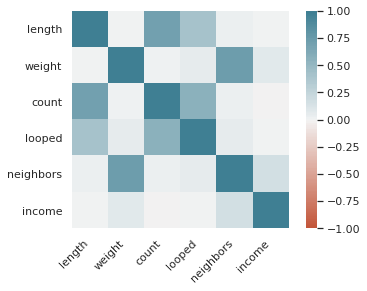

In [10]:
# heat plot
corr = df[['length', 'weight', 'count', 'looped', 'neighbors', 'income', 'label']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

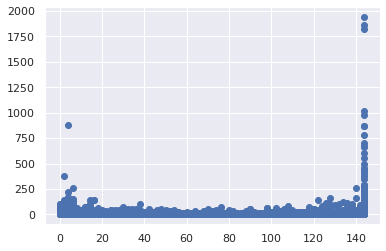

In [18]:
plt.scatter(df['length'], df['weight'])

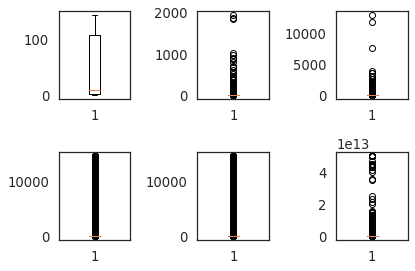

In [38]:
figure, axes = plt.subplots(2, 3)
axes[0, 0].boxplot(df['length'])
axes[0, 1].boxplot(df['weight'])
axes[1, 0].boxplot(df['count'])
axes[1, 1].boxplot(df['looped'])
axes[0, 2].boxplot(df['neighbors'])
axes[1, 2].boxplot(df['income'])
figure.tight_layout()

In [15]:
df['label'].value_counts()

white                  2300268
CryptoWall                9872
CryptoLocker              7422
Cerber                    7381
Locky                     5320
CryptXXX                  1933
NoobCrypt                  388
DMALockerv3                290
DMALocker                  210
CryptoTorLocker2015         47
SamSam                      45
GlobeImposter               36
Globev3                     28
WannaCry                    24
Globe                       22
Razy                        13
APT                          8
KeRanger                     8
XTPLocker                    7
Flyper                       7
CryptConsole                 7
VenusLocker                  6
JigSaw                       4
XLockerv5.0                  4
EDA2                         3
Sam                          1
ComradeCircle                1
Jigsaw                       1
XLocker                      1
Name: label, dtype: int64

In [24]:
scipy.stats.pearsonr(df['length'], df['count'])
scipy.stats.pearsonr(df['length'], df['looped'])
scipy.stats.spearmanr(df['count'], df['looped'])[1] == 0.0

True

In [51]:
df[['length','weight', 'count', 'looped']]
result = scipy.stats.linregress(df['length'], df['label'])
result.pvalue

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [45]:
result = scipy.stats.linregress(df['length'], df['weight'])
result.pvalue

0.35210166605182625

In [46]:
result = scipy.stats.linregress(df['looped'], df['length'])
result.pvalue

0.0

In [49]:
result = scipy.stats.linregress(df['neighbors'], df['weight'])
result.pvalue

0.0

In [50]:
result = scipy.stats.linregress(df['income'], df['neighbors'])
result.pvalue

0.0